<a href="https://colab.research.google.com/github/pulkit48/Deep-Learning/blob/main/04_Methods_to_improve_performance_of_NN/05_Dropout_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
X_train = np.linspace(-1, 1, 20)

In [5]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1, 1, 20)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

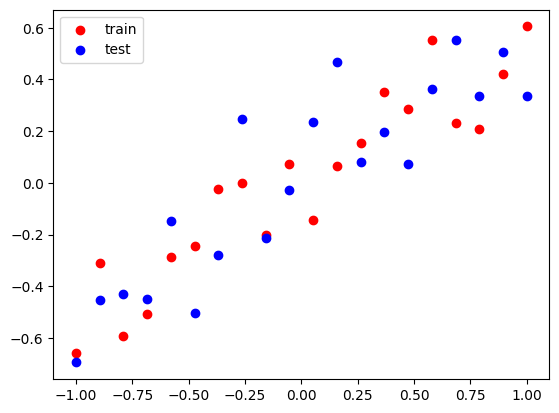

In [9]:
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.legend()
plt.show()


In [13]:
model1=Sequential()
model1.add(Dense(128,input_dim=1,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model1.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [15]:
# evaluate the model
_, train_mse = model1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.00465479027479887, Test: 0.04608919471502304


In [17]:
y_pred_1 = model1.predict(X_test)

1/1 [==============================] - 0s 95ms/step


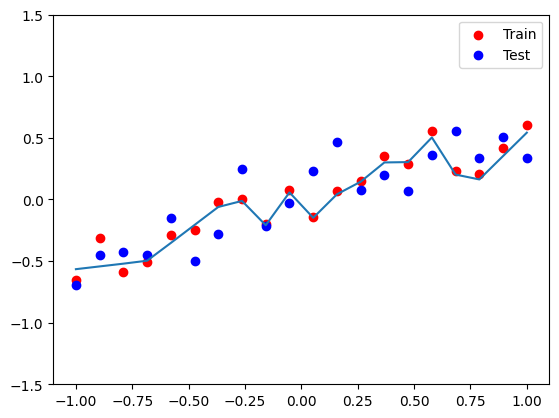

In [18]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout Model

In [21]:
model2=Sequential()
model2.add(Dense(128,input_dim=1,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model2.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [23]:
# evaluate the model
_, train_mse = model2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011155406013131142, Test: 0.03912299871444702


In [27]:
y_pred_2 = model2.predict(X_test)

1/1 [==============================] - 0s 62ms/step


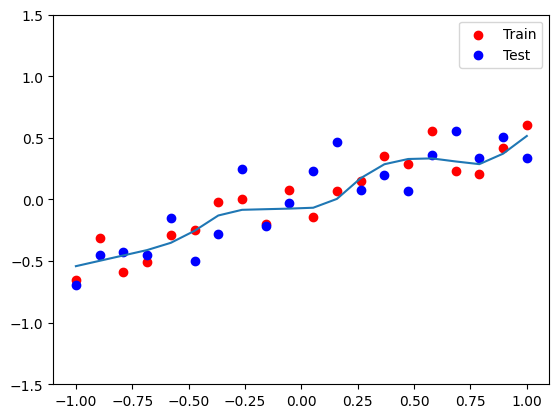

In [28]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()